

## Uma análise sobre livros em uma rede social de livros

#### Francisco Igor da Silva Lima - 507536

Escolhi trabalhar com a análise de livros por ter isso como um dos meus passatempos/afazeres favoritos, e além disso temos uma rede social 100% brasileira apenas para falar sobre livros, apesar dela não disponibilizar dados abertamente, existem pessoas que fizeram alguns datasets (com algumas limitações) nesses livros como o [Vitor Stein](https://github.com/vitorStein/livros-Skoob).

Pretendo responder algumas perguntas baseada no dataset disponibilizado pelo Vitor:

- Quais os livros com melhores notas?
- Quais os livros mais avaliados?
- Quais são as notas que o leitor tem dados aos livros?
- Existe alguma correlação entre os livros mais lidos e a nota deles?
- Existe alguma correlação entre os livros com mais páginas e abandonos?
- O que leva um livro a ter boas notas?


![Merlin](imgs/giphy.gif)




In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dados.csv')

In [3]:
df.head()

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56


### Pre processamento dos dados

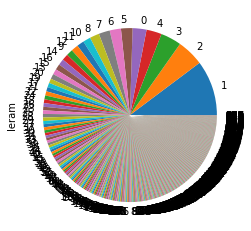

In [4]:
df['leram'].value_counts().plot(kind='pie');

In [5]:
df[df['rating'] <= 0.1]['rating'].value_counts()

0.0    400
Name: rating, dtype: int64

Existem 400 livros com número o nota 0, isso é ocasionado por eles não serem lidos ou se são de fato a média das avaliações?

0    264
1     94
2     24
3     17
7      1
Name: leram, dtype: int64


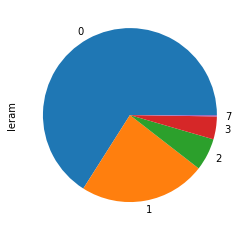

In [6]:
print(df[df['rating'] <= 0.1]['leram'].value_counts())

df[df['rating'] <= 0.1]['leram'].value_counts().plot(kind='pie');

In [7]:
df[(df['leram'] == 7) & (df['rating'] == 0)]

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
5369,Imortalidade Diária,Deepak Chopra,9.788533e+12,8532524230,2009,202,português,Rocco,0.0,0,0,0,0,21,2,7,"Há milhares de anos, os seres humanos se pergu...",,31,69


Bem, a maioria dos livros não foram lidos por leitores do skoob, e alguns tem poucos leitores, e boa parte foram lidos por poucas pessoas, o livro que mais teve leitores que não o avaliaram foi o [Imortalidade Diária](https://www.skoob.com.br/imortalidade-diaria-97015ed107373.html)



Qual é o intervalo das notas de avaliações?

In [8]:
df['rating'].value_counts(ascending=True)

7.0        1
10.0       1
1.7        1
5.5        1
6.5        1
5.8        1
5.3        1
1.8        3
1.3        3
1.5        4
2.1        4
6.0        5
2.4        6
2.2        7
1.0        7
4.9       12
2.3       16
2.6       18
2.0       27
2.5       31
2.7       34
2.8       63
2.9       66
4.8       86
4.7      136
3.1      165
3.2      175
5.0      220
3.0      248
4.6      264
3.3      348
3.4      398
0.0      400
4.5      469
3.5      582
4.4      631
3.6      641
3.7      708
3.9      913
4.3      979
3.8      985
4.2     1023
4.1     1060
4.0     1231
Name: rating, dtype: int64

Existem alguns livros que tem nota maior que 5, o que é muito estranho devido as notas variam entre 1 e 5

In [9]:
df[df['rating'] > 5.1]

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
297,Refúgio no sábado,Míriam Leitão,NaN,NaN,2018,288,português,Intrínseca,6.0,2,0,0,0,10,3,1,NaN,NaN,18,82
1357,Caligrafia para crianças: letra cursiva,Crystal Radke,9.786556e+12,6555640049,2020,80,português,Editora,7.0,2,0,2,2,120,3,5,ATIVIDADES DIVERTIDAS PARA PRATICAR A CALIGRAF...,"Boa diversão! "" - Iberê Thenório e Mari Fulfar...",20,80
4203,Cola,Irvine Welsh,NaN,NaN,2019,320,português,Rocco,6.0,4,1,2,0,24,3,1,A história de quatro garotos criados entre os ...,Ficção,35,65
4405,Dicas da Imensidão,Margaret Atwood,NaN,NaN,2017,242,português,Rocco,6.5,2,0,0,0,5,1,2,"Ela é ativa nas redes sociais, onde frequentem...",Literatura Estrangeira,10,90
8001,Encontre Deus Na Cabana,Randal Rauser,9.788542e+12,8542210549,2017,300,português,Pórtico,5.8,2,1,1,0,15,1,1,Entenda a verdadeira mensagem de A cabana A fi...,Literatura Estrangeira,32,68
8786,Star Wars - Figuras de Chumbo - 36,Lucasfilm Ltd.,9.788575e+12,8574797766,2009,20,português,Planeta,5.5,2,0,0,0,0,0,2,Amigo pessoal e homem de confiança de Luke Sky...,,100,0
8807,Star Wars - Figuras de Chumbo - 57,Lucasfilm Ltd.,9.788575e+12,8574797766,2009,20,português,Planeta,6.0,2,0,0,0,0,0,3,"Conhecido por sua extrema crueldade, o Trandos...",,100,0
8880,Star Wars - Figuras de Chumbo - 05,Lucasfilm Ltd.,9.788575e+12,8574797766,2008,20,português,Planeta,6.0,2,0,0,0,0,0,4,O aspecto demoníaco do aprendiz de Darth Sidio...,,100,0
8890,Star Wars - Figuras de Chumbo - 15,Lucasfilm Ltd.,9.788575e+12,8574797766,2008,20,português,Planeta,6.0,2,0,0,0,2,0,3,O pérfido senador e chanceler foi paulatinamen...,,75,25
10380,O Que Eu Vou Ser Quando Crescer (+ Adesivos),Leticia Braga,9.788595e+12,8595084912,2019,32,português,HarperCollins,10.0,1,0,1,0,4,0,3,"""Você já brincou do que vai ser quando crescer...",Que delícia! Esse faz de conta é tão incrível...,9,91


In [10]:
df2 = df[df['rating'] < 5.1]

In [11]:
print(df.shape)
print(df2.shape)

(11975, 20)
(11964, 20)


Verificando as colunas que mais apresentam valores faltantes temos que as colunas de ISBN são as que apresentam mais valores faltantes, e eles faltam nas mesmas observações

In [12]:
df2.isna().sum()

titulo          0
autor           4
ISBN_13       755
ISBN_10       755
ano             0
paginas         0
idioma          2
editora         1
rating          0
avaliacao       0
resenha         0
abandonos       0
relendo         0
querem_ler      0
lendo           0
leram           0
descricao     656
genero        588
male            0
female          0
dtype: int64

In [13]:
df2[(df2['ISBN_13'].isna()) & (df2['ISBN_10'].isna())].shape

(755, 20)

Os livros que não possuem autores aparenmente foram cadastrados errados, após analisar no site do skoob é possível ver que são livros foram cadastrados duas vezes, com exceção do livro "BRINQUE COMIGO CORES", que não possui cópia, por isso não irei removê-lo

In [14]:
df2[(df2['autor'].isna())]

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
248,Uma Vida No Escuro,NaN,9.788581e+12,8580578833,2018,0,português,Intrínseca,0.0,0,0,0,0,0,0,0,NaN,NaN,0,0
602,Linhagem zero,NaN,9.788581e+12,8580579309,2016,83,português,Intrínseca,0.0,0,0,0,0,0,0,0,Uma nova saga tem início Em Linhagem Zero: Des...,,0,0
2212,BRINQUE COMIGO CORES,NaN,9.788575e+12,8575423703,2008,10,português,Sextante,2.0,1,0,0,0,0,0,2,As crianças vão adorar aprender com a coleção ...,,0,100
8071,O Escravo - da África para a senzala. Ed. Econ...,NaN,9.788542e+12,8542207815,2017,0,português,Editora,3.8,5,0,0,0,0,2,1,NaN,NaN,21,79


In [15]:
df2 = df2.drop([248, 602, 8071])

In [16]:
df2.isna().sum()

titulo          0
autor           1
ISBN_13       755
ISBN_10       755
ano             0
paginas         0
idioma          2
editora         1
rating          0
avaliacao       0
resenha         0
abandonos       0
relendo         0
querem_ler      0
lendo           0
leram           0
descricao     654
genero        586
male            0
female          0
dtype: int64

Existem muitas observações com descrição e genero ausente, por isso resolvi não removê-los do dataset

In [17]:
df2[(df2['genero'].isna())]

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
15,DUPLICADO Este é o Mar,Mariana Enriquez,9.788551e+12,8551005014,2020,0,português,Intrínseca,0.0,0,0,0,0,1,0,1,NaN,NaN,50,50
30,A Convenção Das Aves,Ransom Riggs,9.788551e+12,855100624X,2020,320,português,Intrínseca,4.3,4,0,0,0,3,0,1,NaN,NaN,0,100
118,Os prós e os contras de nunca esquecer,Val Emmich,9.788551e+12,8551003690,2019,320,português,Intrínseca,4.2,26,3,0,0,43,3,29,NaN,NaN,19,81
125,Box Trilogia Verão: Box com 3 volumes da coleção,Jenny Han,9.788551e+12,8551004727,2019,736,português,Intrínseca,4.0,192,10,4,0,299,11,238,NaN,NaN,2,98
139,A Loja de Tudo. Jeff Bezos e a Era da Amazon (...,Brad Stone,9.788551e+12,8551004735,2019,400,português,Intrínseca,3.9,9,1,0,0,27,6,14,NaN,NaN,75,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,Anos 80 de A a Z,Rodrigo Rudiger,9.788599e+12,8599187031,2005,96,português,Universo,3.6,24,0,0,0,12,0,41,NaN,NaN,43,57
11557,Dossiê Hitler,Sérgio Pereira Couto,9.788599e+12,8599187546,0,128,português,Universo,3.8,4,0,0,0,3,1,8,NaN,NaN,52,48
11678,Fevereiro,Eveline Sin,9.788592e+12,8592366410,2018,68,português,Independente,4.0,2,0,0,0,1,0,3,NaN,NaN,0,100
11801,Frederic and Elfrida,Jane Austen,9.783905e+12,3905493314,2019,11,português,Martin,0.0,0,0,0,0,0,0,0,NaN,NaN,0,0


In [18]:
df2[(df2['descricao'].isna())]

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
15,DUPLICADO Este é o Mar,Mariana Enriquez,9.788551e+12,8551005014,2020,0,português,Intrínseca,0.0,0,0,0,0,1,0,1,NaN,NaN,50,50
30,A Convenção Das Aves,Ransom Riggs,9.788551e+12,855100624X,2020,320,português,Intrínseca,4.3,4,0,0,0,3,0,1,NaN,NaN,0,100
118,Os prós e os contras de nunca esquecer,Val Emmich,9.788551e+12,8551003690,2019,320,português,Intrínseca,4.2,26,3,0,0,43,3,29,NaN,NaN,19,81
125,Box Trilogia Verão: Box com 3 volumes da coleção,Jenny Han,9.788551e+12,8551004727,2019,736,português,Intrínseca,4.0,192,10,4,0,299,11,238,NaN,NaN,2,98
139,A Loja de Tudo. Jeff Bezos e a Era da Amazon (...,Brad Stone,9.788551e+12,8551004735,2019,400,português,Intrínseca,3.9,9,1,0,0,27,6,14,NaN,NaN,75,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11557,Dossiê Hitler,Sérgio Pereira Couto,9.788599e+12,8599187546,0,128,português,Universo,3.8,4,0,0,0,3,1,8,NaN,NaN,52,48
11678,Fevereiro,Eveline Sin,9.788592e+12,8592366410,2018,68,português,Independente,4.0,2,0,0,0,1,0,3,NaN,NaN,0,100
11801,Frederic and Elfrida,Jane Austen,9.783905e+12,3905493314,2019,11,português,Martin,0.0,0,0,0,0,0,0,0,NaN,NaN,0,0
11805,Henry e Eliza,Jane Austen,9.780950e+12,0950008737,2019,9,português,Martin,5.0,1,0,0,0,0,0,0,NaN,Uma novela do Livro Lady susan e outras histór...,0,0


In [19]:
df = df2

In [20]:
del df2

### Quais os livros com melhores notas?

In [21]:
df.sort_values(by=['rating'], ascending=False).head(10)

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
9143,Fé Bahá'í,William S. Hatcher,9.788586e+12,858569033X,2006,297,português,Planeta,5.0,1,1,0,0,1,0,2,Fé Bahá 'í é uma excelente introdução à histór...,,100,0
8052,Alan Kardec Essencial,Allan Kardec,9.788542e+12,854221093X,2017,336,português,Editora,5.0,2,0,0,0,3,1,1,NaN,NaN,55,45
1345,A surpreendente ciência do sucesso,Eric Barker,9.788543e+12,8543109507,2020,320,português,Editora,5.0,5,0,0,0,331,8,2,POR QUE (QUASE) TUDO QUE VOCÊ SABE SOBRE SER B...,Autoajuda / Literatura Estrangeira / Negócios ...,33,67
10505,An expert teacher,Tomoko Takakura,9.784596e+12,4596171777,2018,126,inglês,HarperCollins,5.0,1,0,0,0,0,0,1,Why is Luke ORourke at her brothers wedding?...,But while he acts like a sophisticated gentle...,0,100
5991,O Inventor Do Papel,Janet Gleeson,9.788533e+12,8532519113,2005,304,português,Rocco,5.0,2,0,0,0,8,1,4,O que existe em comum entre uma dona-de-casa c...,,44,56
5997,Como incendiar seu coração,Raphael Cushnir,NaN,NaN,2005,320,português,Rocco,5.0,1,0,0,0,1,2,1,"O título já indica que é um livro de amor, mas...",,33,67
6026,"Você Pode Ter Saúde, Basta Querer",Catharina Walzberg,9.788533e+12,8532515509,2004,260,português,Rocco,5.0,3,0,1,1,6,2,4,"Alimentação saudável, exercício físico adequad...",,47,53
9146,Transtorno do Déficit de Atenção,Mabel Condemarim,9.788577e+12,8576651319,2006,254,português,Planeta,5.0,3,0,0,0,2,0,6,O transtorno do Déficit de Atenção com Hiperat...,,20,80
6041,No princípio era a roda,Roberto M. Moura,9.788533e+12,8532517900,2004,318,português,Rocco,5.0,4,0,1,0,37,3,11,Estou seguro de que este livro terá um grande ...,"""Roberto DaMatta""",37,63
1326,Coleção Eu Me Chamo Antonio,Pedro Gabriel,9.788551e+12,8551004565,1969,0,português,Intrínseca,5.0,2,0,0,0,1,0,2,NaN,NaN,0,100


Como é possível ver, os livros com melhores notas apresentam poucas avaliações, ou seja, um livro que poucas pessoas leram mas gostaram, acabam ficando com uma nota maior, para tal vamos analisar livros com mais de 30 avaliações

In [22]:
df[(df['avaliacao'] > 30)].sort_values(by=['rating'], ascending=False).head(10)

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
4371,Harry Potter e as Relíquias da Morte,J.K. Rowling,9.788533e+12,8532530842,2017,512,português,Rocco,4.8,164,10,1,0,257,6,218,"D'Harry Potter e as relíquias da morte', de JK...",Fantasia / Ficção / Infantojuvenil / Literatur...,18,82
5587,Harry Potter e as Relíquias da Morte,J.K. Rowling,9.788533e+12,8532522610,2007,592,português,Rocco,4.8,109,1,715,688,101,2,320,"Desta vez, Harry Potter foi encarregado de uma...",Ficção / Aventura / Fantasia / Infantojuvenil ...,27,73
4923,Harry Potter e As Relíquias da Morte,J.K. Rowling,9.788533e+12,8532522610,2012,551,português,Rocco,4.8,109,1,715,688,101,2,320,"Desta vez, Harry Potter foi encarregado de uma...",Ficção / Aventura / Fantasia / Infantojuvenil ...,27,73
7276,A Sagração da Primavera,Modris Eksteins,9.788533e+12,8532500781,1992,502,português,Rocco,4.8,33,4,3,1,337,24,64,"""Rites of Spring: The Great War and the Birth ...",Artes / Comunicação / História / Não-ficção / ...,60,40
50,O Árabe do Futuro,Riad Sattouf,9.788551e+12,8551006665,2020,288,português,Intrínseca,4.8,43,7,0,0,111,3,41,"No quarto volume da série, o quadrinista Riad ...","Biografia, Autobiografia, Memórias / HQ, comic...",35,65
9819,Um Eco Na Escuridão,Francine Rivers,9.788577e+12,8576867664,2019,462,português,Verus,4.8,120,17,1,1,597,6,124,A espetacular continuação da história de Hadas...,Mas será que ele vai conseguir negar tudo o q...,9,91
1341,Histórias lindas de morrer,Ana Claudia Quintana Arantes,9.788543e+12,854310954X,2020,224,português,Sextante,4.8,282,46,1,2,901,34,270,AUTORA DO BEST-SELLER A MORTE É UM DIA QUE VAL...,Autoajuda / Literatura Brasileira,11,89
3290,Box Trono de Vidro (Acompanha Brindes),Sarah J mass,9.788501e+12,8501303496,2020,4606,português,Galera,4.8,32,0,0,0,87,15,31,"O box trono de vidro traz, pela primeira vez, ...",Fantasia,7,93
4372,Harry Potter e as Relíquias da Morte,J.K. Rowling,9.788533e+12,8532530842,2017,511,português,Rocco,4.8,109,1,715,688,101,2,320,Deveria ser só uma história para o público inf...,Ficção / Aventura / Fantasia / Infantojuvenil ...,27,73
4134,Harry Potter e as Relíquias da Morte,J.K. Rowling,9.788533e+12,8532531822,2020,640,português,Rocco,4.8,109,1,715,688,101,2,320,Há 20 anos a magia aterrissou no Brasil com a ...,Ficção / Aventura / Fantasia / Infantojuvenil ...,27,73


Baseado nisso, os 3 livros mais bem avaliados são repetidos, o livro Harry Potter e as Relíquias da Morte em diversas edições, incluindo o 9º e o 10º mais lido também. Apenas 1 sendo brasileiro o 7°, Histórias lindas de morrer 

In [23]:
# existem pouco mais de 10 mil livros únicos nessa base

print(df.shape)
print(df['titulo'].unique().shape)

(11961, 20)
(10604,)


In [24]:
# como observado, existem livros com nomes iguais, mas com letras maiúsculas e minúsculas juntas, 
#  para resolver tal problema vamos deixar todos os nomes maiúsculas, vamos remover os duplicados 
#  apenas nessas avaliações, pois não queremos perder eles

df[df['avaliacao'] > 30].sort_values(by=['rating'], ascending=False).drop_duplicates(subset=['titulo'], keep='first').head(10)

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
4371,Harry Potter e as Relíquias da Morte,J.K. Rowling,9.788533e+12,8532530842,2017,512,português,Rocco,4.8,164,10,1,0,257,6,218,"D'Harry Potter e as relíquias da morte', de JK...",Fantasia / Ficção / Infantojuvenil / Literatur...,18,82
4923,Harry Potter e As Relíquias da Morte,J.K. Rowling,9.788533e+12,8532522610,2012,551,português,Rocco,4.8,109,1,715,688,101,2,320,"Desta vez, Harry Potter foi encarregado de uma...",Ficção / Aventura / Fantasia / Infantojuvenil ...,27,73
7276,A Sagração da Primavera,Modris Eksteins,9.788533e+12,8532500781,1992,502,português,Rocco,4.8,33,4,3,1,337,24,64,"""Rites of Spring: The Great War and the Birth ...",Artes / Comunicação / História / Não-ficção / ...,60,40
50,O Árabe do Futuro,Riad Sattouf,9.788551e+12,8551006665,2020,288,português,Intrínseca,4.8,43,7,0,0,111,3,41,"No quarto volume da série, o quadrinista Riad ...","Biografia, Autobiografia, Memórias / HQ, comic...",35,65
9819,Um Eco Na Escuridão,Francine Rivers,9.788577e+12,8576867664,2019,462,português,Verus,4.8,120,17,1,1,597,6,124,A espetacular continuação da história de Hadas...,Mas será que ele vai conseguir negar tudo o q...,9,91
1341,Histórias lindas de morrer,Ana Claudia Quintana Arantes,9.788543e+12,854310954X,2020,224,português,Sextante,4.8,282,46,1,2,901,34,270,AUTORA DO BEST-SELLER A MORTE É UM DIA QUE VAL...,Autoajuda / Literatura Brasileira,11,89
3290,Box Trono de Vidro (Acompanha Brindes),Sarah J mass,9.788501e+12,8501303496,2020,4606,português,Galera,4.8,32,0,0,0,87,15,31,"O box trono de vidro traz, pela primeira vez, ...",Fantasia,7,93
327,Como Combater a Fúria de Um Dragão,Cressida Cowell,9.788551e+12,8551001175,2017,496,português,Intrínseca,4.8,37,0,2,0,260,4,57,Dragões vs Humanos: é este o fim? É o dia do j...,"Quando o dia chegar ao fim, Soluço poderá ser ...",34,66
3311,A Rainha do Nada,Holly Black,9.788501e+12,8501304018,2020,294,português,Galera,4.8,68,16,0,0,21,6,24,A rainha do nada é o aguardado final da trilog...,Fantasia / Romance,4,96
4370,Harry Potter e o Enigma do Príncipe,J.K. Rowling,9.788533e+12,8532530834,2017,432,português,Rocco,4.8,155,10,1,0,229,6,192,Deveria ser só uma história para o público inf...,Fantasia / Ficção / Infantojuvenil / Literatur...,18,82


In [25]:
df['titulo'] = df['titulo'].str.upper()

In [26]:
df[df['avaliacao'] > 30].sort_values(by=['rating'], ascending=False).drop_duplicates(subset=['titulo'], keep='first').head(10)

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
4371,HARRY POTTER E AS RELÍQUIAS DA MORTE,J.K. Rowling,9.788533e+12,8532530842,2017,512,português,Rocco,4.8,164,10,1,0,257,6,218,"D'Harry Potter e as relíquias da morte', de JK...",Fantasia / Ficção / Infantojuvenil / Literatur...,18,82
7276,A SAGRAÇÃO DA PRIMAVERA,Modris Eksteins,9.788533e+12,8532500781,1992,502,português,Rocco,4.8,33,4,3,1,337,24,64,"""Rites of Spring: The Great War and the Birth ...",Artes / Comunicação / História / Não-ficção / ...,60,40
50,O ÁRABE DO FUTURO,Riad Sattouf,9.788551e+12,8551006665,2020,288,português,Intrínseca,4.8,43,7,0,0,111,3,41,"No quarto volume da série, o quadrinista Riad ...","Biografia, Autobiografia, Memórias / HQ, comic...",35,65
9819,UM ECO NA ESCURIDÃO,Francine Rivers,9.788577e+12,8576867664,2019,462,português,Verus,4.8,120,17,1,1,597,6,124,A espetacular continuação da história de Hadas...,Mas será que ele vai conseguir negar tudo o q...,9,91
1341,HISTÓRIAS LINDAS DE MORRER,Ana Claudia Quintana Arantes,9.788543e+12,854310954X,2020,224,português,Sextante,4.8,282,46,1,2,901,34,270,AUTORA DO BEST-SELLER A MORTE É UM DIA QUE VAL...,Autoajuda / Literatura Brasileira,11,89
3290,BOX TRONO DE VIDRO (ACOMPANHA BRINDES),Sarah J mass,9.788501e+12,8501303496,2020,4606,português,Galera,4.8,32,0,0,0,87,15,31,"O box trono de vidro traz, pela primeira vez, ...",Fantasia,7,93
327,COMO COMBATER A FÚRIA DE UM DRAGÃO,Cressida Cowell,9.788551e+12,8551001175,2017,496,português,Intrínseca,4.8,37,0,2,0,260,4,57,Dragões vs Humanos: é este o fim? É o dia do j...,"Quando o dia chegar ao fim, Soluço poderá ser ...",34,66
3311,A RAINHA DO NADA,Holly Black,9.788501e+12,8501304018,2020,294,português,Galera,4.8,68,16,0,0,21,6,24,A rainha do nada é o aguardado final da trilog...,Fantasia / Romance,4,96
4370,HARRY POTTER E O ENIGMA DO PRÍNCIPE,J.K. Rowling,9.788533e+12,8532530834,2017,432,português,Rocco,4.8,155,10,1,0,229,6,192,Deveria ser só uma história para o público inf...,Fantasia / Ficção / Infantojuvenil / Literatur...,18,82
3418,A TERRA QUE PERDI,Cassandra Clare,NaN,NaN,2018,123,português,Galera,4.8,70,3,0,0,90,0,75,O sétimo conto da série Fantasmas do Mercado d...,Fantasia / Literatura Estrangeira,7,93


O método acima retorna os livros ordenados apenas por nota, mas vamos ordenar eles por quantidade de avaliações, pois a nota de livro com muitas avaliações positivas é mais "impactante" que um livro com poucas avaliações

In [27]:
df[df['avaliacao'] > 30].sort_values(by=['rating', 'avaliacao'], ascending=False).drop_duplicates(subset=['titulo'], keep='first').head(10)

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
2066,QUEDA DE GIGANTES,Ken Follett,9.788599e+12,859929685X,2010,912,português,Sextante,4.8,525,19,18,0,583,82,1,"Cinco famílias, cinco países e cinco destinos ...",Ficção / História,32,68
1341,HISTÓRIAS LINDAS DE MORRER,Ana Claudia Quintana Arantes,9.788543e+12,854310954X,2020,224,português,Sextante,4.8,282,46,1,2,901,34,270,AUTORA DO BEST-SELLER A MORTE É UM DIA QUE VAL...,Autoajuda / Literatura Brasileira,11,89
4367,HARRY POTTER E O PRISIONEIRO DE AZKABAN,J.K. Rowling,9.788533e+12,853253080X,2017,288,português,Rocco,4.8,226,9,1,1,194,10,293,Durante 12 anos o forte de Azkaban guardou o p...,Fantasia / Ficção / Infantojuvenil,18,82
4368,HARRY POTTER E O CÁLICE DE FOGO,J.K. Rowling,9.788533e+12,8532530818,2017,480,português,Rocco,4.8,223,14,1,2,193,20,287,"Nesta aventura, o feiticeiro cresceu e está co...",Fantasia / Ficção / Infantojuvenil / Literatur...,19,81
4371,HARRY POTTER E AS RELÍQUIAS DA MORTE,J.K. Rowling,9.788533e+12,8532530842,2017,512,português,Rocco,4.8,164,10,1,0,257,6,218,"D'Harry Potter e as relíquias da morte', de JK...",Fantasia / Ficção / Infantojuvenil / Literatur...,18,82
4370,HARRY POTTER E O ENIGMA DO PRÍNCIPE,J.K. Rowling,9.788533e+12,8532530834,2017,432,português,Rocco,4.8,155,10,1,0,229,6,192,Deveria ser só uma história para o público inf...,Fantasia / Ficção / Infantojuvenil / Literatur...,18,82
9819,UM ECO NA ESCURIDÃO,Francine Rivers,9.788577e+12,8576867664,2019,462,português,Verus,4.8,120,17,1,1,597,6,124,A espetacular continuação da história de Hadas...,Mas será que ele vai conseguir negar tudo o q...,9,91
3418,A TERRA QUE PERDI,Cassandra Clare,NaN,NaN,2018,123,português,Galera,4.8,70,3,0,0,90,0,75,O sétimo conto da série Fantasmas do Mercado d...,Fantasia / Literatura Estrangeira,7,93
3311,A RAINHA DO NADA,Holly Black,9.788501e+12,8501304018,2020,294,português,Galera,4.8,68,16,0,0,21,6,24,A rainha do nada é o aguardado final da trilog...,Fantasia / Romance,4,96
50,O ÁRABE DO FUTURO,Riad Sattouf,9.788551e+12,8551006665,2020,288,português,Intrínseca,4.8,43,7,0,0,111,3,41,"No quarto volume da série, o quadrinista Riad ...","Biografia, Autobiografia, Memórias / HQ, comic...",35,65


Nesse caso, o livro Queda de de Gigantes e Histórias lindas de morrer aparecem em primeiro lugar, e os livros da saga Harry Potter aparecem entre o 3º e 6º lugares. Porém, como esses livros costumam ter muitas edições, e utilizamos apenas a com a maior nota e com mais avaliações esse ranking provavelmente estaria ocupado com todos os livros do Harry Potter caso fizessemos alguma média ponderada entre as edições de livros iguais

### Quais os livros mais avaliados?

In [28]:
df.sort_values(by=['avaliacao'], ascending=False).head(10)

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
5348,CLARICE NA CABECEIRA,Clarice Lispector,9.788533e+12,8532524877,2009,254,português,Rocco,4.3,999,32,42,5,1,171,1,Este livro é um livro de contos selecionados p...,Ficção,17,83
5225,CLARICE NA CABECEIRA,Clarice Lispector,9.788533e+12,8532526063,2010,176,português,Rocco,4.3,999,32,42,5,1,171,1,Este livro traz uma reunião de vinte textos se...,Ficção,17,83
5607,A CIRANDA DAS MULHERES SÁBIAS,Clarissa Pinkola Estés,9.788533e+12,8532521509,2007,128,português,Rocco,4.1,998,117,13,4,1,173,1,"Autora do clássico ""Mulheres que Correm com os...",,4,96
5261,A SOLIDÃO DOS NÚMEROS PRIMOS,Paolo Giordano,9.788533e+12,8532524729,2009,288,português,Rocco,4.1,998,68,24,6,1,35,1,"Em sua estreia literária, com apenas 25 anos, ...",Ficção / Literatura Estrangeira / Romance,18,82
5739,LIVRO DUPLICADO,Clarissa Pinkola Estés,9.788533e+12,8532521509,2007,122,português,Rocco,4.1,998,117,13,4,1,173,1,O LUGAR QUE ALMEJAMOS É A TERRA ONDE OS HUMANO...,Esoterismo,4,96
1718,GERAÇÃO DE VALOR 2,Flávio Augusto da Silva,9.788543e+12,8543103029,2015,208,português,Sextante,4.3,996,51,13,7,2,137,1,O primeiro Geração de Valor vendeu mais de 100...,Administração / Negócios e Empreendedorismo,51,49
2029,"A REVOLTA DE ATLAS, VOL. 3",Ayn Rand,9.788599e+12,8599296833,2010,496,português,Arqueiro,4.4,994,37,37,2,1,104,1,"Na mitologia grega, o titã Atlas recebe de Zeu...",Ficção / Literatura Estrangeira,60,40
8733,ENCONTRE DEUS NA CABANA,Randal Rauser,9.788577e+12,8576654636,2009,176,português,Planeta,3.3,994,36,509,5,1,178,2,O sucesso do livro A Cabana trouxe à tona muit...,""" Revista VejaAutoajuda / Literatura Estrangei...",20,80
4067,GAROTA SEM LIMITE,Cecily von Ziegesar,NaN,NaN,2008,271,português,Galera,3.9,993,9,26,1,1,25,2,"Jenny Humphrey, uma das mais polêmicas persona...","Mas se no amor e na guerra vale tudo, o que v...",4,96
7639,CORAÇÕES QUEBRADOS,Sofia Silva,9.788559e+12,8558890781,2018,344,português,Editora,4.2,989,152,41,3,3,77,1,"Com mais de um milhão de leituras no Wattpad, ...",Romance,4,96


#### Sobre livros repetidos

Os dois livros mais bem avaliados são os mesmos, entretanto eles não tem a mesma quantidade de páginas, isso se dá pelo fato dessa editora publicar vários livros com o mesmo título, mas com um subtítulo diferentes, como pode ser visto mais abaixo.

#### Sobre o livro 'LIVRO DUPLICADO'

Ao pesquisar no skoob existe existe de fato um livro com o título LIVRO DUPLICADO na sua base, com o mesmo ISBN, e autor  mas com outras valores de notas, avaliação. O motivo disso é incerto, mas provavelmente seja por conta dos dados no skoob estarem atualizados enquanto no csv não.

- Clarice na Cabeceira: Cronicas
![Clarice na Cabeceira: Crônicas](imgs/clarice-cronicas.jpg)
- Clarice na Cabeceira: Contos
![Clarice na Cabeceira: Contos](imgs/clarice-contos.jpg)

In [29]:
df[(df.titulo == 'CLARICE NA CABECEIRA')] 

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
4922,CLARICE NA CABECEIRA,Clarice Lispector,9.788533e+12,8532528023,2012,240,português,Rocco,4.2,144,5,10,1,661,34,298,"Uma das maiores escritoras brasileiras, Claric...",,14,86
5225,CLARICE NA CABECEIRA,Clarice Lispector,9.788533e+12,8532526063,2010,176,português,Rocco,4.3,999,32,42,5,1,171,1,Este livro traz uma reunião de vinte textos se...,Ficção,17,83
5348,CLARICE NA CABECEIRA,Clarice Lispector,9.788533e+12,8532524877,2009,254,português,Rocco,4.3,999,32,42,5,1,171,1,Este livro é um livro de contos selecionados p...,Ficção,17,83


In [30]:
df[df.autor == 'Clarissa Pinkola Estés']

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
4278,MULHERES QUE CORREM COM OS LOBOS,Clarissa Pinkola Estés,9.788533e+12,853252978X,2018,576,português,Rocco,4.5,2,231,690,123,19,5,4,Os lobos foram pintados com um pincel negro no...,Literatura Estrangeira / Psicologia,4,96
4905,LIBERTEM A MULHER FORTE,Clarissa Pinkola Estés,9.788533e+12,8532527728,2012,408,português,Rocco,4.2,29,5,1,0,405,32,53,Primeiro livro inédito da psicanalista Claris...,Literatura Estrangeira / Religião e Espiritual...,5,95
5607,A CIRANDA DAS MULHERES SÁBIAS,Clarissa Pinkola Estés,9.788533e+12,8532521509,2007,128,português,Rocco,4.1,998,117,13,4,1,173,1,"Autora do clássico ""Mulheres que Correm com os...",,4,96
5739,LIVRO DUPLICADO,Clarissa Pinkola Estés,9.788533e+12,8532521509,2007,122,português,Rocco,4.1,998,117,13,4,1,173,1,O LUGAR QUE ALMEJAMOS É A TERRA ONDE OS HUMANO...,Esoterismo,4,96
6732,MULHERES QUE CORREM COM OS LOBOS,Clarissa Pinkola Estés,9.788533e+12,8532504442,1999,627,português,Rocco,4.5,2,231,690,123,19,5,4,"Sensações de vazio, fadiga, medo, depressão, ...",Psicologia / Literatura Estrangeira,4,96
6810,O DOM DA HISTÓRIA,Clarissa Pinkola Estés,9.788533e+12,8532508200,1998,39,português,Rocco,4.3,77,8,0,0,217,8,124,Clarissa Pinkola Estés tem encantado leitores ...,Psicologia,10,90
7062,MULHERES QUE CORREM COM OS LOBOS,Clarissa Pinkola Estés,NaN,NaN,1996,627,português,Rocco,4.5,2,231,690,123,19,5,4,NaN,NaN,4,96
7162,MULHERES QUE CORREM COM OS LOBOS,Clarissa Pinkola Estés,9.788533e+12,8532504442,1994,627,português,Rocco,4.5,2,231,690,123,19,5,4,"Sensações de vazio, fadiga, medo, depressão, f...",Psicologia / Literatura Estrangeira,4,96
7273,O JARDINEIRO QUE TINHA FÉ,Clarissa Pinkola Estés,9.788533e+12,8532506925,1992,92,português,Rocco,4.1,181,16,1,1,345,20,305,"Clarissa Pinkola Estés avisa logo de início: ""...",,10,90


In [31]:
df[df.titulo == 'LIVRO DUPLICADO']

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
5739,LIVRO DUPLICADO,Clarissa Pinkola Estés,9.788533e+12,8532521509,2007,122,português,Rocco,4.1,998,117,13,4,1,173,1,O LUGAR QUE ALMEJAMOS É A TERRA ONDE OS HUMANO...,Esoterismo,4,96


### Quais são as notas que o leitor tem dados aos livros?

In [32]:
df['rating'].describe()

count    11961.000000
mean         3.796213
std          0.843663
min          0.000000
25%          3.600000
50%          4.000000
75%          4.200000
max          5.000000
Name: rating, dtype: float64

In [33]:
print(df.shape)
print(df[df['rating'] >= 3].shape)

(11961, 20)
(11273, 20)


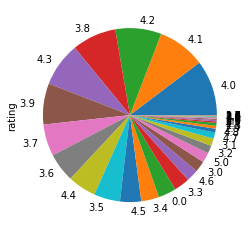

In [34]:
df['rating'].value_counts().plot.pie();

Analisando os dados "por cima", temos que a maioria dos livros tem boas notas, acima de 3, e que a mediana está acima da nota 4. Isso pode ocorrer pois os livros são de editoras grandes e famosas que tem um processo de publicação mais rigoroso.

### Existe alguma correlação entre os livros mais lidos e a nota deles?

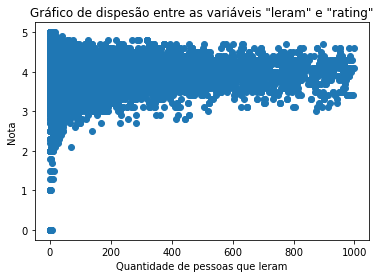

In [35]:
plt.scatter(df['leram'], df['rating'])#, c=colors, alpha=0.5)
plt.title('Gráfico de dispesão entre as variáveis "leram" e "rating"')
plt.xlabel('Quantidade de pessoas que leram')
plt.ylabel('Nota')
plt.show()

O fato de existirem poucos livros com notas baixas, mas esses livros foram lidos por poucas pessoas. Enquanto nenhum livro lido por muitas pessoas tem nota baixa, isso pode ser pelo efeito "maria-vai-com-as-outras", pelo fato de várias pessoas lerem ele e dar notas positivas ninguém quer ser o "diferentão" por não gostar do livro

### Existe alguma correlação entre os livros com mais páginas e abandonos?

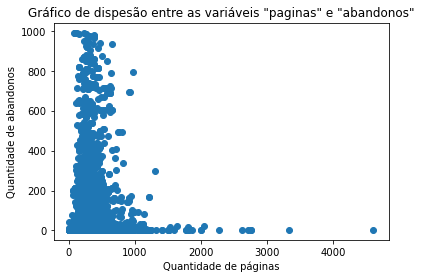

In [36]:
plt.scatter(df['paginas'], df['abandonos'])#, c=colors, alpha=0.5)
plt.title('Gráfico de dispesão entre as variáveis "paginas" e "abandonos"')
plt.xlabel('Quantidade de páginas')
plt.ylabel('Quantidade de abandonos')

plt.show()

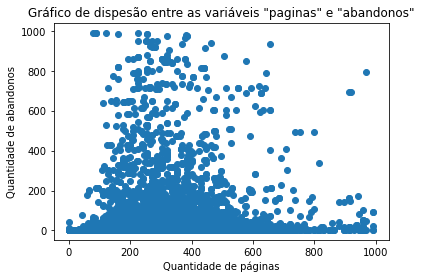

In [37]:
# Como a maioria dos livros se encontra ente 1 e 1000 páginas, vamos analisar apenas esse intervalo de dados

plt.scatter(df[df['paginas'] < 1000]['paginas'], df[df['paginas'] < 1000]['abandonos'])
plt.title('Gráfico de dispesão entre as variáveis "paginas" e "abandonos"')
plt.xlabel('Quantidade de páginas')
plt.ylabel('Quantidade de abandonos')
plt.show()

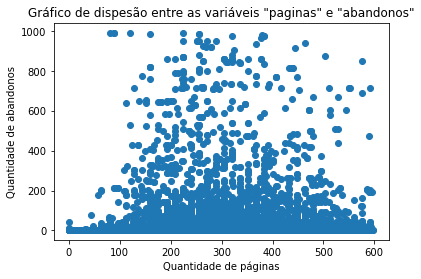

In [38]:
# Como a maioria dos livros se encontra ente 1 e 600 páginas, vamos analisar apenas esse intervalo de dados

plt.scatter(df[df['paginas'] < 600]['paginas'], df[df['paginas'] < 600]['abandonos'])
plt.title('Gráfico de dispesão entre as variáveis "paginas" e "abandonos"')
plt.xlabel('Quantidade de páginas')
plt.ylabel('Quantidade de abandonos')
plt.show()

In [39]:
print(df.shape)
print(df[df['paginas'] < 1000].shape)
print(df[df['paginas'] < 600].shape)

(11961, 20)
(11895, 20)
(11590, 20)


Mesmo assim, não existe uma regra entre livros com mais páginas e a quantidade de vezes que ele foi abandonado, mesmo levando em consideração intervalos onde estão a maioria dos livros

### O que leva um livro a ter boas notas?

In [40]:
cmap = sn.choose_diverging_palette(as_cmap=False)

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

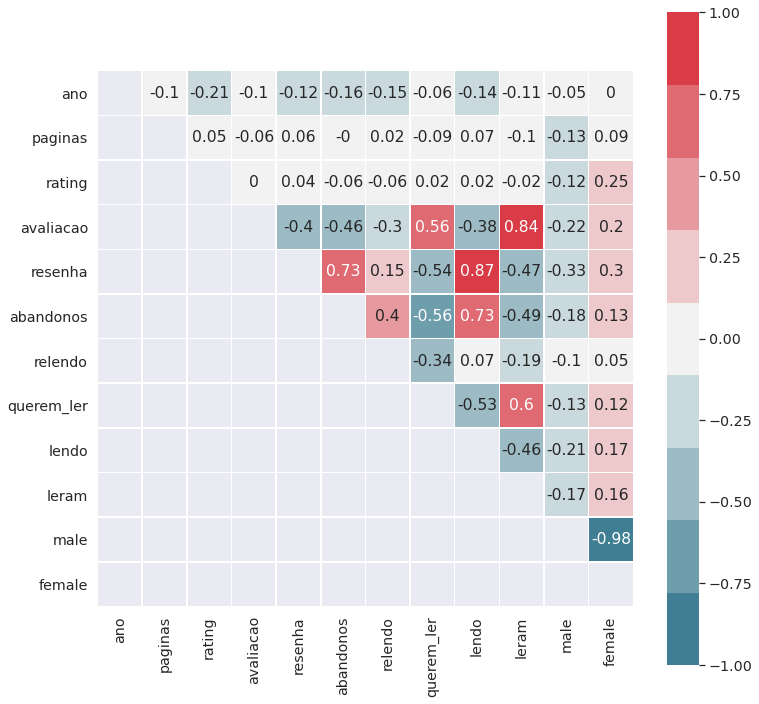

In [41]:
sn.set(font_scale=1.3)
df_corr_cols = df.drop(['ISBN_10', 'ISBN_13', 'descricao'], 1).corr()#[['ano', 'paginas', 'idioma', 'editora', 'rating', 'avaliacao', 'resenha', 'abandonos', 'relendo', 'querem_ler', 'lendo', 'leram']].corr()
df_corr_cols.round(decimals=2)
corrMatrix = df_corr_cols.corr()
mask = np.tril(np.ones_like(corrMatrix, dtype=bool))
az = plt.figure(figsize=(12,12))

heatmap = sn.heatmap(corrMatrix.round(decimals=2), mask=mask, linecolor='white', linewidths=.5, 
                     cmap=cmap, vmin=-1, vmax=1, square=True, annot=True)

Existe, fortes correçãoes entre o número de avaliações e entre o número de pessoas que já leram, o que não é uma supresa pois para avaliar um livro é necessário lê-lo. Outras correçãoes que existem são entre o número de pessoas lendo com a quanitade de resenhas e abandonos, o que surpreende a quantidade de pessoas lendo e abandonos. Além de uma correlação negativa entre abandonos e lidos.

Além de não termos nenhuma variável forte que influencie a nota do livro